## Successful Attempt of Frailty Index
#### By Gavin Qu, July 7th 2024

### Data Extraction
- Reads each wave's data from its respective file
- Extracts only the specified variables for each wave
- Adds a 'wave' column to identify the source wave for each row
- Combines all waves' data into a single DataFrame

In [5]:
import os
import pandas as pd

# Set directory
data_dir = '/Users/gavinqu/Desktop/School/Dissertation/UKDA-6614-stata/stata/stata13_se/ukhls'
output_dir = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data'

# Base list of relevant variables (without wave prefix)
base_variables = [
    'pidp',
    'age_dv',
    'disdif1', 'disdif2', 'disdif3', 'disdif4', 'disdif5', 'disdif6', 'disdif7', 'disdif8',
    'disdif9', 'disdif10', 'disdif11',
    'hcond1', 'hcond2', 'hcond3', 'hcond4', 'hcond5', 'hcond6', 'hcond7', 'hcond8', 
    'hcond9', 'hcond10', 'hcond11', 'hcond12', 'hcond13', 'hcond14', 'hcond15', 'hcond16', 
    'hcondn1', 'hcondn2', 'hcondn3', 'hcondn4', 'hcondn5', 'hcondn6', 'hcondn7', 'hcondn8', 
    'hcondn9', 'hcondn10', 'hcondn11', 'hcondn12', 'hcondn13', 'hcondn14', 'hcondn15', 'hcondn16', 
    'hcondever1', 'hcondever2', 'hcondever3', 'hcondever4', 'hcondever5', 'hcondever6', 'hcondever7', 'hcondever8', 
    'hcondever9', 'hcondever10', 'hcondever11', 'hcondever12', 'hcondever13', 'hcondever14', 'hcondever15', 'hcondever16', 
    'hcondnew1', 'hcondnew2', 'hcondnew3', 'hcondnew4', 'hcondnew5', 'hcondnew6', 'hcondnew7', 'hcondnew8', 
    'hcondnew9', 'hcondnew10', 'hcondnew11', 'hcondnew12', 'hcondnew13', 'hcondnew14', 'hcondnew15', 'hcondnew16', 
]

# Initialize an empty list to store DataFrames
df_list = []

# Process each wave
for wave in 'abcdefghijklm':
    file_path = os.path.join(data_dir, f'{wave}_indresp.dta')
    
    # Read the .dta file to get available columns
    with pd.read_stata(file_path, iterator=True) as stata_file:
        available_columns = stata_file.variable_labels().keys()
    
    # Create a list of variables that exist in this wave's data
    wave_vars = ['pidp'] + [f'{wave}_{var}' for var in base_variables[1:] if f'{wave}_{var}' in available_columns]
    
    # Read only the available columns
    df_wave = pd.read_stata(file_path, columns=wave_vars, convert_categoricals=False)
    df_wave['wave'] = wave
    
    df_list.append(df_wave)
    print(f"Processed wave {wave}, extracted {len(wave_vars)} variables")

# Combine all DataFrames
df_combined = pd.concat(df_list, ignore_index=True)

# Save to CSV
output_path = os.path.join(output_dir, 'ukhls_extracted.csv')
df_combined.to_csv(output_path, index=False)

print(f"Extracted data saved to {output_path}")
print(f"Total rows: {len(df_combined)}")
print(f"Total columns: {len(df_combined.columns)}")

Processed wave a, extracted 29 variables
Processed wave b, extracted 29 variables


/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_96863/1201396102.py:33: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  available_columns = stata_file.variable_labels().keys()
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_96863/1201396102.py:39: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_wave = pd.read_stata(file_path, columns=wave_vars, convert_categoricals=False)


Processed wave c, extracted 45 variables
Processed wave d, extracted 45 variables


/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_96863/1201396102.py:33: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  available_columns = stata_file.variable_labels().keys()
/var/folders/n2/8hz3y3r90rj63gkzgrl1hwg40000gn/T/ipykernel_96863/1201396102.py:39: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  df_wave = pd.read_stata(file_path, columns=wave_vars, convert_categoricals=False)


Processed wave e, extracted 45 variables
Processed wave f, extracted 45 variables
Processed wave g, extracted 45 variables
Processed wave h, extracted 45 variables
Processed wave i, extracted 45 variables
Processed wave j, extracted 43 variables
Processed wave k, extracted 43 variables
Processed wave l, extracted 43 variables
Processed wave m, extracted 43 variables
Extracted data saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_extracted.csv
Total rows: 533476
Total columns: 534


### Data Wrangling and New Variable Construction
#### Creating the 'healthcond' variable

In [ ]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_extracted.csv')

# Define waves and health condition variables
waves = 'abcdefghijklm'
health_vars = ['hcond', 'hcondn', 'hcondever', 'hcondnew']

# Create a list of all possible health condition columns
all_health_cols = [f'{w}_{v}{i}' for w in waves for v in health_vars for i in range(1, 17)]

# Filter to only include columns that exist in the dataframe
health_cols = [col for col in all_health_cols if col in df.columns]

# Create a mask for positive diagnoses (1), negative diagnoses (0), and missing data
positive_mask = df[health_cols] == 1
negative_mask = (df[health_cols] == 0) | (df[health_cols] < 0)
missing_mask = df[health_cols].isna()

# Create new health condition variables
for i in range(1, 17):
    cols_i = [col for col in health_cols if col.endswith(str(i))]
    df[f'healthcond_{i}'] = np.select(
        [positive_mask[cols_i].any(axis=1),
         negative_mask[cols_i].all(axis=1) & ~missing_mask[cols_i].all(axis=1)],
        [1, 0],
        default=np.nan
    )

# Forward fill the 1s for each pidp
df = df.sort_values(['pidp', 'wave'])
for i in range(1, 17):
    df[f'healthcond_{i}'] = df.groupby('pidp')[f'healthcond_{i}'].transform(
        lambda x: x.replace({0: np.nan}).ffill().fillna(0))

# Save the updated dataset
df.to_csv('ukhls_health_conditions_vectorized.csv', index=False)

### Test count of the healthcond variables

In [13]:
import pandas as pd
import numpy as np

# Load the data
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_vectorized.csv')

# Function to count value types
def count_value_types(series):
    return pd.Series({
        'Total': len(series),
        'Ones': (series == 1).sum(),
        'Zeros': (series == 0).sum(),
        'NaNs': series.isna().sum()
    })

# Analyze healthcond variables
healthcond_vars = [f'healthcond_{i}' for i in range(1, 17)]
results = df[healthcond_vars].apply(count_value_types).T

# Calculate percentages
results_percent = results.div(results['Total'], axis=0) * 100

# Combine counts and percentages
final_results = pd.concat([results, results_percent.add_suffix('_percent')], axis=1)

# Display results
print(final_results.round(2))

# Optional: Save results to CSV
final_results.round(2).to_csv('healthcond_analysis.csv')

# Additional check for any unexpected values
unexpected_values = df[healthcond_vars].apply(lambda x: x[(x != 1) & (x != 0) & (~x.isna())].value_counts())
if unexpected_values.sum().sum() > 0:
    print("\nUnexpected values found:")
    print(unexpected_values)
else:
    print("\nNo unexpected values found. All values are 0, 1, or NaN as expected.")

                Total    Ones   Zeros  NaNs  Total_percent  Ones_percent  \
healthcond_1   533476   72236  461240     0          100.0         13.54   
healthcond_2   533476   89435  444041     0          100.0         16.76   
healthcond_3   533476   29687  503789     0          100.0          5.56   
healthcond_4   533476   44129  489347     0          100.0          8.27   
healthcond_5   533476   19256  514220     0          100.0          3.61   
healthcond_6   533476  106461  427015     0          100.0         19.96   
healthcond_7   533476   10312  523164     0          100.0          1.93   
healthcond_8   533476    4186  529290     0          100.0          0.78   
healthcond_9   533476    6133  527343     0          100.0          1.15   
healthcond_10  533476   19378  514098     0          100.0          3.63   
healthcond_11  533476    9672  523804     0          100.0          1.81   
healthcond_12  533476   10158  523318     0          100.0          1.90   
healthcond_1

### Construction of the Frailty Index

In [14]:
import pandas as pd
import numpy as np

# Load the main dataset
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_health_conditions_vectorized.csv')

# Load the death dataset
death_df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/extracted_dcsedw_dv_with_deaths.csv')

# Define waves
waves = 'abcdefghijklm'

# Create frailty variables
for wave in waves:
    # Identify relevant columns for this wave
    healthcond_cols = [f'healthcond_{i}' for i in range(1, 17)]
    disdif_cols = [f'{wave}_disdif{i}' for i in range(1, 12)]
    
    # Count 1s in healthcond and disdif variables
    df[f'{wave}_frailty'] = df[healthcond_cols + disdif_cols].apply(lambda row: 
        (row == 1).sum() / len(row), axis=1)

# Sort the dataframe by pidp and wave
df = df.sort_values(['pidp', 'wave'])

# Create a death indicator
death_indicator = death_df.set_index('pidp')[['b_death', 'c_death', 'd_death', 'e_death', 
                                              'f_death', 'g_death', 'h_death', 'i_death', 
                                              'j_death', 'k_death', 'l_death', 'm_death']]

# Merge death indicator with main dataframe
df = df.merge(death_indicator, on='pidp', how='left')

# Update frailty based on death
for i, wave in enumerate(waves[1:], start=1):  # Start from 'b' as there's no 'a_death'
    death_col = f'{wave}_death'
    df.loc[df[death_col] == 1, [f'{w}_frailty' for w in waves[i:]]] = 1

# Fill NaN values in frailty with 0
frailty_cols = [f'{wave}_frailty' for wave in waves]
df[frailty_cols] = df[frailty_cols].fillna(0)

# Save the result
output_path = '/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_with_frailty.csv'
df.to_csv(output_path, index=False)

print(f"Data with frailty measures saved to {output_path}")

# Quick summary of frailty measures
frailty_summary = df[frailty_cols].describe()
print("\nFrailty Summary:")
print(frailty_summary)

Data with frailty measures saved to /Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_with_frailty.csv

Frailty Summary:
           a_frailty      b_frailty      c_frailty      d_frailty  \
count  533476.000000  533476.000000  533476.000000  533476.000000   
mean        0.042904       0.043252       0.043965       0.045552   
std         0.064715       0.067101       0.073620       0.084010   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.074074       0.074074       0.074074       0.074074   
max         0.740741       1.000000       1.000000       1.000000   

           e_frailty      f_frailty      g_frailty      h_frailty  \
count  533476.000000  533476.000000  533476.000000  533476.000000   
mean        0.047314       0.049651       0.053040       0.057190   
std         0.094267       0

### Plot of Frailty from age 20 and above
We want a smoothed line of best fit rather than a percentile representation. We can use a **LOWESS** (Locally Weighted Scatterplot Smoothing) approach to achieve this.

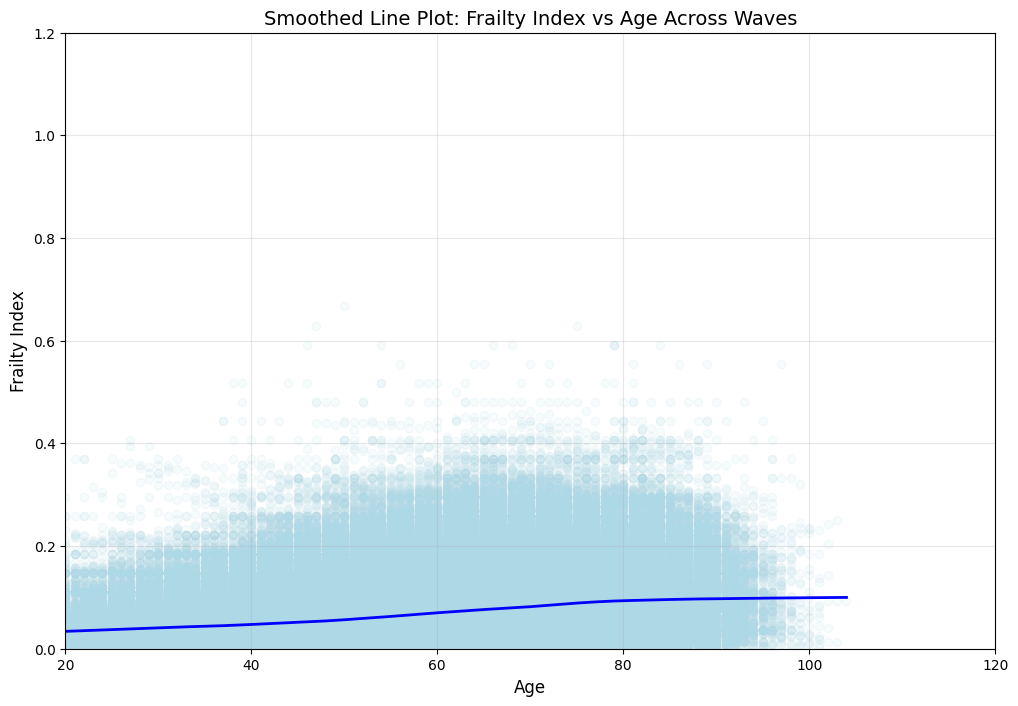

Plot displayed

Summary Statistics:
count    303104.000000
mean          0.076438
std           0.062155
min           0.002849
25%           0.034188
50%           0.062678
75%           0.108262
max           0.666667
Name: frailty_score, dtype: float64

Number of observations used in the plot: 303104

Number of observations with frailty score 1: 0

Age range:
count    303104.000000
mean         56.077802
std          16.713788
min          20.000000
25%          44.000000
50%          57.000000
75%          69.000000
max         104.000000
Name: age, dtype: float64


In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# Load the data
df = pd.read_csv('/Users/gavinqu/Desktop/School/Dissertation/EssexDissertation/Data/ukhls_with_frailty.csv')

# Define waves
waves = 'abcdefghijklm'

# Melt the dataframe to long format
id_vars = ['pidp']
age_vars = [f'{w}_age_dv' for w in waves]
frailty_vars = [f'{w}_frailty' for w in waves]

df_long = pd.melt(df, id_vars=id_vars, 
                  value_vars=age_vars + frailty_vars, 
                  var_name='variable', value_name='value')

# Split the 'variable' column into 'wave' and 'measure'
df_long[['wave', 'measure']] = df_long['variable'].str.split('_', n=1, expand=True)

# Pivot to wide format
df_wide = df_long.pivot_table(index=['pidp', 'wave'], columns='measure', values='value').reset_index()

# Rename columns
df_wide.columns.name = None
df_wide = df_wide.rename(columns={'age_dv': 'age', 'frailty': 'frailty_score'})

# Filter out NaN frailty scores, and ages below 20 or above 120
df_filtered = df_wide[(df_wide['frailty_score'] >+ 0) & 
                      (df_wide['frailty_score'].notna()) & 
                      (df_wide['age'] >= 20) & 
                      (df_wide['age'] <= 120)]

# Perform LOWESS smoothing
smoothed = lowess(df_filtered['frailty_score'], df_filtered['age'], frac=0.15)

# Create the plot
plt.figure(figsize=(12, 8))
plt.scatter(df_filtered['age'], df_filtered['frailty_score'], alpha=0.1, color='lightblue')
plt.plot(smoothed[:, 0], smoothed[:, 1], color='blue', linewidth=2)

plt.xlabel('Age', fontsize=12)
plt.ylabel('Frailty Index', fontsize=12)
plt.title('Smoothed Line Plot: Frailty Index vs Age Across Waves', fontsize=14)
plt.grid(True, alpha=0.3)

# Set axis limits
plt.xlim(20, 120)
plt.ylim(0, 1.2)

# Show the plot
plt.show()

print("Plot displayed")

# Print some summary statistics
print("\nSummary Statistics:")
print(df_filtered['frailty_score'].describe())
print("\nNumber of observations used in the plot:", len(df_filtered))
print("\nNumber of observations with frailty score 1:", (df_filtered['frailty_score'] == 1).sum())
print("\nAge range:")
print(df_filtered['age'].describe())